In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")

In [2]:
fb=pd.merge(fba,fbb,how="outer")
politics = pd.read_csv('9th_legislator_promise.csv')

以台北市第一選區立委吳思瑤為例，依照月份來統計數值資料的變化

In [3]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [4]:
#政見 有哪些立委
politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘', '莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀', '林俊憲', '蔣萬安',
       '立法委員 馬文君', '鍾佳濱', '費鴻泰（阿力克司）', '何志偉', '余天 Yu Tian', '陳素月SayYes',
       '陳超明-阿明哥粉絲團'], dtype=object)

In [6]:
wu = fb[fb.page_name == "吳思瑤"]
# 把時間格式轉換
wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
wu['post_hour'] = pd.to_datetime(wu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')
wu.head(1)

<ipython-input-6-0cb454a6a6f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date
<ipython-input-6-0cb454a6a6f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['post_hour'] = pd.to_datetime(wu['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-6-0cb454a6a6f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12516,211122988933967_2083766385002942,211122988933967,吳思瑤,政治人物,老朋友，新想像！\n\n歡迎文嘉大哥的光榮歸隊。,NaN,photo,https://www.facebook.com/211122988933967/posts...,2019-01-13T12:14:00+0000,2019-01-13T20:14:00,...,0,0,0,0,0,21,4,2019-01-13,20,2019-01


In [7]:
#發文時間分佈
post_time = wu[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,2
1,7,20
2,8,17
3,9,15
4,10,12
5,11,7
6,12,23
7,13,13
8,14,5
9,15,4


In [9]:
wu[wu.created_time_taipei == max(wu.created_time_taipei)]
#找出時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12926,211122988933967_2738515549528019,211122988933967,吳思瑤,政治人物,這是我主持過，最難忘的一場造勢晚會。\n滿場的熱情、感動的呼喊、滿滿的正能量⋯⋯\n這些都是...,NaN,photo,https://www.facebook.com/211122988933967/posts...,2020-01-10T15:59:41+0000,2020-01-10T23:59:41,...,0,0,0,0,0,201,36,2020-01-10,23,2020-01


In [10]:
wu[wu.created_time_taipei == min(wu.created_time_taipei)]
#找出時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
12527,211122988933967_2065865370126377,211122988933967,吳思瑤,政治人物,2019，思瑤祝福大家，比好更好！\n\n#狗女兒ZaZa一起來祝福喔\n#祝福詞都想不出什麼梗了,NaN,photo,https://www.facebook.com/211122988933967/posts...,2019-01-01T01:10:30+0000,2019-01-01T09:10:30,...,0,0,0,0,0,20,8,2019-01-01,9,2019-01


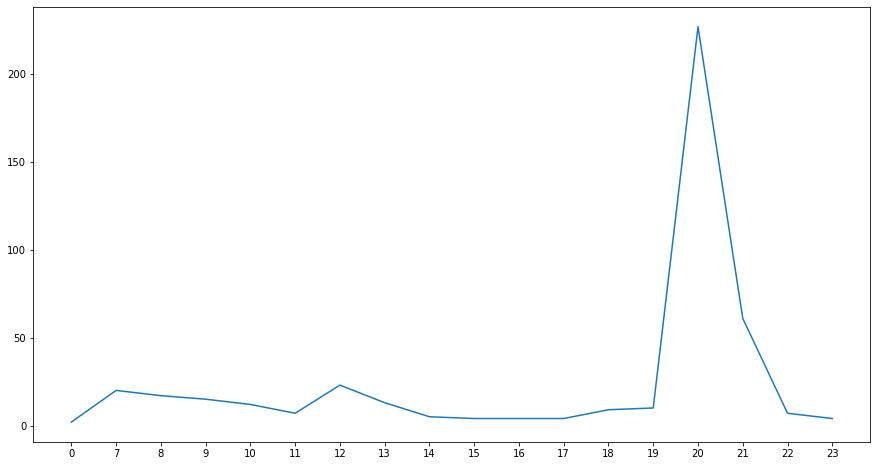

In [11]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

相當符合選區特性（士林北投）

In [12]:
#整年貼文數量分佈
whole_year = wu[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,38
1,2019-02,31
2,2019-03,36
3,2019-04,34
4,2019-05,27
5,2019-06,27
6,2019-07,31
7,2019-08,28
8,2019-09,29
9,2019-10,39


In [13]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,34.153846
std,8.998575
min,23.000000
25%,28.000000
50%,31.000000
75%,38.000000
max,57.000000


In [14]:
results = wu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,8022673579490746,9409,0,0,0,0,0,642,284,603
2019-02,6544812656952977,12299,0,0,0,0,0,863,862,527
2019-03,7600427601622812,22219,0,0,0,0,0,1590,400,625
2019-04,7178181623754878,20302,0,0,0,0,0,1466,633,616
2019-05,5700320701217109,19574,0,0,0,0,0,1527,768,522
2019-06,5700320701217109,27384,0,0,0,0,0,1432,457,540
2019-07,6544812656952977,27688,0,0,0,0,0,1242,347,617
2019-08,5911443690151076,26400,0,0,0,0,0,956,348,545
2019-09,6122566679085043,25866,0,0,0,0,0,1047,430,565


In [15]:
results.index.name = 'newhead' #將上行定義出的results索引標籤命名為newhead
results.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列，個人覺得意義不大
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,8022673579490746,9409,0,0,0,0,0,642,284,603
1,2019-02,6544812656952977,12299,0,0,0,0,0,863,862,527
2,2019-03,7600427601622812,22219,0,0,0,0,0,1590,400,625
3,2019-04,7178181623754878,20302,0,0,0,0,0,1466,633,616
4,2019-05,5700320701217109,19574,0,0,0,0,0,1527,768,522
5,2019-06,5700320701217109,27384,0,0,0,0,0,1432,457,540
6,2019-07,6544812656952977,27688,0,0,0,0,0,1242,347,617
7,2019-08,5911443690151076,26400,0,0,0,0,0,956,348,545
8,2019-09,6122566679085043,25866,0,0,0,0,0,1047,430,565
9,2019-10,8233796568424713,37818,0,0,0,0,0,1772,571,679


In [16]:
results['newhead'].map(str)#將索引標籤newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

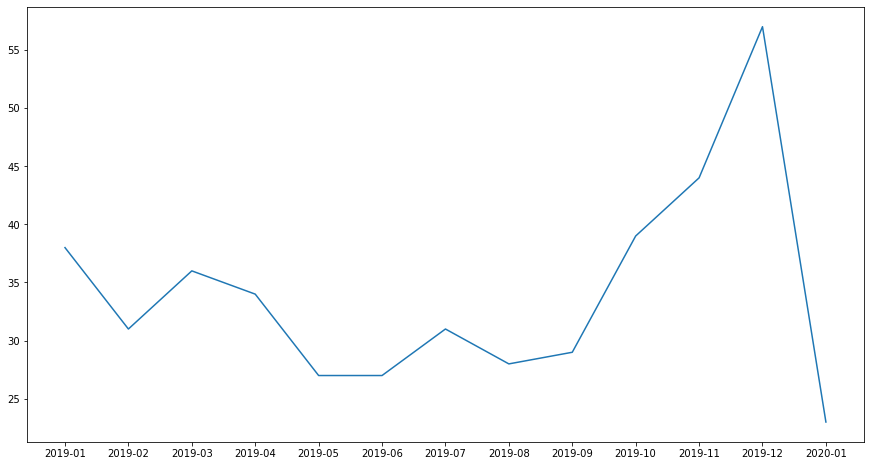

In [17]:
#畫出整年貼文分佈
labels = results['newhead'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, whole_year['post_id'])

plt.show()

In [18]:
# 每個月的按讚、評論、分享總數 分佈
results = wu.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,8022673579490746,9409,0,0,0,0,0,642,284,603
1,2019-02,6544812656952977,12299,0,0,0,0,0,863,862,527
2,2019-03,7600427601622812,22219,0,0,0,0,0,1590,400,625
3,2019-04,7178181623754878,20302,0,0,0,0,0,1466,633,616
4,2019-05,5700320701217109,19574,0,0,0,0,0,1527,768,522
5,2019-06,5700320701217109,27384,0,0,0,0,0,1432,457,540
6,2019-07,6544812656952977,27688,0,0,0,0,0,1242,347,617
7,2019-08,5911443690151076,26400,0,0,0,0,0,956,348,545
8,2019-09,6122566679085043,25866,0,0,0,0,0,1047,430,565
9,2019-10,8233796568424713,37818,0,0,0,0,0,1772,571,679


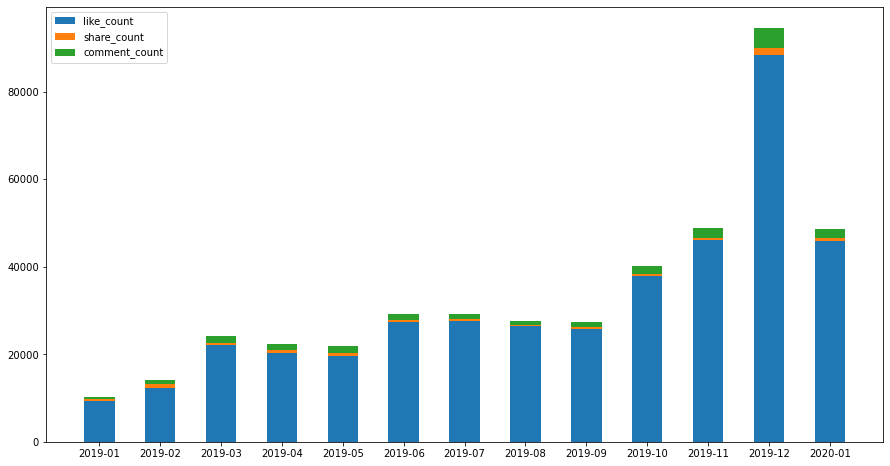

In [19]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

In [22]:
#找出評論數量的統計值
wu['comment_count'].describe()

count    444.000000
mean      48.159910
std       47.946115
min        2.000000
25%       19.000000
50%       32.000000
75%       62.000000
max      409.000000
Name: comment_count, dtype: float64

In [23]:
#找出按讚數量的統計值
wu['like_count'].describe()

count     444.000000
mean      921.486486
std       751.395855
min        92.000000
25%       390.500000
50%       679.500000
75%      1268.000000
max      5688.000000
Name: like_count, dtype: float64

In [20]:
# 很明顯12月按讚、分享、評論數衝高，因此找出12月的資料
high = wu[wu.month_year == "2019-12"]
results_high = high.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-12-01,633368966801901,5750,0,0,0,0,0,609,106,47
1,2019-12-03,422245977867934,4472,0,0,0,0,0,239,130,27
2,2019-12-05,211122988933967,1610,0,0,0,0,0,70,16,22
3,2019-12-06,422245977867934,1434,0,0,0,0,0,75,50,28
4,2019-12-07,211122988933967,716,0,0,0,0,0,28,9,20
5,2019-12-08,211122988933967,1706,0,0,0,0,0,69,34,20
6,2019-12-09,422245977867934,2568,0,0,0,0,0,184,29,38
7,2019-12-10,211122988933967,941,0,0,0,0,0,27,8,20
8,2019-12-11,422245977867934,3014,0,0,0,0,0,121,67,27
9,2019-12-12,422245977867934,2301,0,0,0,0,0,155,18,27


No handles with labels found to put in legend.


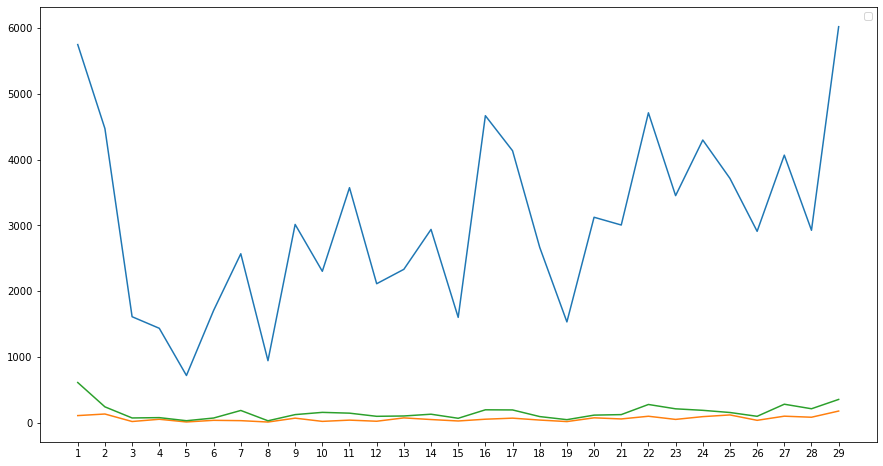

In [21]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,30)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

In [24]:
#12/1、24、31號很明顯按讚較高  因此找出這天的文章
wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str
Dec_01 = wu[wu['new_date'] == "2019-12-01"]
Dec_01[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-24-6551a9e18297>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
12886,《美麗的誤會，正能量無懼》 賴清德院長今天第三度來為思瑤站台加持，受訪時小小口誤，把吳斯懷...,108,1770
12887,思斯有兩種！ 賴院長今天的一字口誤，我一點都不在意。 吳思瑤、吳斯懷一字之差，理念與價值是...,92,2221
12888,【Live】思瑤&小英聯合競選總部成立現場直播 10:00 開始,409,1759


In [25]:
#12/1、24、31號很明顯按讚較高  因此找出這天的文章
wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str
Dec_24 = wu[wu['new_date'] == "2019-12-24"]
Dec_24[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-25-b5fc01b45cfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
12900,「思瑤姐姐，你怎麼騎這麼久都不會累啊？！」 「哼！姐姐我可是每天都在鍛鍊呢！」 今天謝謝林...,57,2185
12901,思瑤和飛帆來奉茶囉！,218,2527


In [26]:
#12/1、24、31號很明顯按讚較高  因此找出這天的文章
wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str
Dec_31 = wu[wu['new_date'] == "2019-12-31"]
Dec_31[['message','comment_count', 'like_count']].replace(r'\n', ' ', regex = True)

<ipython-input-26-8e98bdc4a3b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date']=wu['new_date'].map(str) # turn 'new_date' into str


,message,comment_count,like_count
12949,改革，是為了下一代，也是為了更好的明天。 我們這一屆國會，應該是有史以來抗爭最...,336,5688
12950,今天立院就要審議反滲透法了， 但你知道為什麼要立《反滲透法》嗎？ 《反滲透法》會是政客們的照...,16,334


12/31，選前影片，訴諸於政績，勇於改革（同婚、年金改革、轉型正義、司法改革等）、多次強調蔡英文第一任任內勇於改革

In [28]:
#按讚次數最多的貼文 
mostlike_10 = wu.sort_values(by = ['like_count'],ascending = False).head(10)
mostlike_10[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
12949,改革，是為了下一代，也是為了更好的明天。 我們這一屆國會，應該是有史以來抗爭最...,5688,2019-12
12926,這是我主持過，最難忘的一場造勢晚會。 滿場的熱情、感動的呼喊、滿滿的正能量⋯⋯ 這些都是原因...,4921,2020-01
12620,NaN,4870,2019-03
12733,今天下午在路邊，聽到一個熟悉的聲音大喊「思瑤姐姐！」 轉頭一看，竟然是剛上任的副秘書長林飛帆...,4350,2019-07
12682,激烈的初選結束，可以好好來探討這場初選的意義。 民進黨必須感謝賴清德，感念他不計毀譽的堅持，...,3482,2019-06
12941,呱吉跟黃郁芬 士林北投加分議員要跟思瑤一起來騎車囉！,3077,2020-01
12935,吳思瑤努力，政見看得見！ 參與公辦政見會，是向公民報告，是身為一個候選人應盡的義務。 很...,3061,2020-01
12931,這四年立院推動的政策很多、完成的工作很多，哪一樣最困難？最值得紀錄？ 我的答案，無庸置疑就...,2870,2020-01
12948,2019歲末最後一天，我們通過了《反滲透法》，希望能竭盡所能防堵任何影響台灣民主的行為，保護...,2757,2020-01
12959,#下架吳斯懷， #上架吳思瑤，你我一起來💪 就在這個禮拜天，民進黨【護國保台 1229下架...,2729,2019-12


In [29]:
#最多讚數前10的文章的 種類 video / photo?
mostlike_10 = wu.sort_values(by = ['like_count'],ascending=False).head(10)
mostlike_10.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,7,7,7,7,6,1,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
video,3,3,3,3,3,1,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [30]:
# 比較、查看他政見
promise = politics[politics.姓名 == "吳思瑤"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['0    1、北投天母宜居社區 改善天母交通，拒絕大型開發，保存綠地與文化資產', '爭取復興崗國防大學校...']

1. 觸及高內容多為強調改革政績、中國因素、總統
2. 與政見相似處在於政見有改革之意味，以及政見有地方牛肉
3. 每月貼文數高（近乎每天一篇）；曝光度中等